In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
pwd()

'C:\\Users\\mural'

In [3]:
df=pd.read_csv('final.csv')

In [4]:
df.shape

(110, 7)

In [5]:
df.head()

,Unnamed: 0,symbol,lastPrice,totalBuyQuantity,totalSellQuantity,Times,Time
0,53,TATAGLOBAL,266.20,367034.0,1934603.0,5.270910,15:13
1,10,OFSS,3017.00,38255.0,14259.0,2.682867,15:13
2,103,BEL,99.75,1330187.0,519077.0,2.562601,15:13
3,52,TATAELXSI,649.00,167239.0,75909.0,2.203151,15:13
4,87,NATIONALUM,39.80,2196572.0,1131917.0,1.940577,15:13


In [6]:
def xy(r):
    d=[]
    for i in range(1,r+1):
        if(r%i==0):
            d.append(i)
    int(len(d)/2+1)

    if len(d)%2==0:
        a=d[int(len(d)/2-1)]
        b=d[int(len(d)/2)]
    df1=pd.DataFrame(index=list(np.arange(r)),columns={'Yrows','Xcols'})
    j=0
    k=0
    while(k<=b-1):
        for i in range(b):
            df1['Yrows'][j]=k
            df1['Xcols'][j]=i
            j=j+1
        k=k+1
    return(df1)

In [7]:
df1=xy(110)

In [8]:
df1.head()

,Yrows,Xcols
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [12]:
df=df.join(df1)

In [15]:
df.head()

,Unnamed: 0,symbol,lastPrice,totalBuyQuantity,totalSellQuantity,Times,Time,Yrows,Xcols
0,53,TATAGLOBAL,266.20,367034.0,1934603.0,5.270910,15:13,0,0
1,10,OFSS,3017.00,38255.0,14259.0,2.682867,15:13,0,1
2,103,BEL,99.75,1330187.0,519077.0,2.562601,15:13,0,2
3,52,TATAELXSI,649.00,167239.0,75909.0,2.203151,15:13,0,3
4,87,NATIONALUM,39.80,2196572.0,1131917.0,1.940577,15:13,0,4


In [16]:
df.columns

Index(['Unnamed: 0', 'symbol', 'lastPrice', 'totalBuyQuantity',
       'totalSellQuantity', 'Times', 'Time', 'Yrows', 'Xcols'],
      dtype='object')

In [17]:
df.drop(['Unnamed: 0','Times', 'Time'],axis=1,inplace=True)

In [18]:
df.head()

,symbol,lastPrice,totalBuyQuantity,totalSellQuantity,Yrows,Xcols
0,TATAGLOBAL,266.20,367034.0,1934603.0,0,0
1,OFSS,3017.00,38255.0,14259.0,0,1
2,BEL,99.75,1330187.0,519077.0,0,2
3,TATAELXSI,649.00,167239.0,75909.0,0,3
4,NATIONALUM,39.80,2196572.0,1131917.0,0,4


In [22]:
type(df['lastPrice'][1])

numpy.float64

In [20]:
symbol=(np.asarray(df['symbol'])).reshape(10,11)
lastPrice=(np.asarray(df['lastPrice'])).reshape(10,11)
totalBuyQuantity=(np.asarray(df['totalBuyQuantity'])).reshape(10,11)
totalSellQuantity=(np.asarray(df['totalSellQuantity'])).reshape(10,11)

print("symbol=",end="")
print('\t')
print('\t')
print(symbol)
print('\n')
print("lastPrice=") 
print('\t') 
print(lastPrice)
print('\n')
print("totalBuyQuantity=") 
print('\t') 
print(totalBuyQuantity)
print('\n')
print("totalSellQuantity=") 
print('\t') 
print(totalSellQuantity)

symbol=	
	
[['TATAGLOBAL' 'OFSS' 'BEL' 'TATAELXSI' 'NATIONALUM' 'NBCC' 'UPL' 'PEL'
  'BAJAJFINSV' 'CASTROLIND' 'BOSCHLTD']
 ['INFRATEL' 'CADILAHC' 'CIPLA' 'PVR' 'HDFC' 'NMDC' 'EXIDEIND'
  'AMARAJABAT' 'SAIL' 'RAYMOND' 'NTPC']
 ['VOLTAS' 'INFY' 'HINDALCO' 'GRASIM' 'ONGC' 'CHOLAFIN' 'UBL'
  'INDUSINDBK' 'ULTRACEMCO' 'HINDZINC' 'MUTHOOTFIN']
 ['BANKBARODA' 'TATACHEM' 'CUMMINSIND' 'ESCORTS' 'MINDTREE' 'RAMCOCEM'
  'BAJFINANCE' 'HDFCBANK' 'COALINDIA' 'M&amp;M' 'BALKRISIND']
 ['BATAINDIA' 'MCX' 'NCC' 'AMBUJACEM' 'GLENMARK' 'SBIN' 'ACC' 'TECHM'
  'TATASTEEL' 'MCDOWELL-N' 'OIL']
 ['HAVELLS' 'MRF' 'ITC' 'AXISBANK' 'RECLTD' 'NESTLEIND' 'BPCL' 'JSWSTEEL'
  'BIOCON' 'ASIANPAINT' 'SIEMENS']
 ['COLPAL' 'PETRONET' 'BRITANNIA' 'CENTURYTEX' 'TATAPOWER' 'KAJARIACER'
  'MGL' 'MARUTI' 'BHARATFORG' 'KOTAKBANK' 'DABUR']
 ['CONCOR' 'GODREJCP' 'CANBK' 'LT' 'HINDUNILVR' 'TORNTPHARM' 'LICHSGFIN'
  'HEXAWARE' 'BAJAJ-AUTO' 'TVSMOTOR' 'CESC']
 ['TORNTPOWER' 'MFSL' 'MANAPPURAM' 'APOLLOTYRE' 'WIPRO' 'NIITTECH' 'TCS'

In [23]:
result=df.pivot(index='Yrows',columns='Xcols',values='lastPrice')
print(result)

Xcols       0         1        2        3        4         5         6   \
Yrows                                                                     
0       266.20   3017.00    99.75   649.00    39.80     31.95    546.50   
1       247.15    219.75   465.85  1487.40  2039.90     80.20    177.15   
2       612.40    802.10   179.35   719.35   122.15    260.50   1304.00   
3        93.35    554.10   574.95   452.55   707.60    717.50   3176.00   
4      1479.60    850.05    53.85   197.20   367.40    271.35   1472.10   
5       645.90  57861.75   236.05   664.00   141.95  12425.50    329.15   
6      1192.00    239.25  2467.25   828.10    54.25    466.00    845.10   
7       487.85    599.80   216.60  1284.00  1857.30   1657.30    426.65   
8       283.80    445.20   120.35   165.80   251.00   1369.05   2247.35   
9      1362.65    738.15   325.55   395.50   362.85  18336.80  15365.65   

Xcols       7        8        9         10  
Yrows                                       
0      17

In [27]:
labels=(np.asarray(["{0} \n {1:.2f} \n {2} \n {3}".format(symb,lastprice,totbquant,totsquant) 
                    for symb,lastprice,totbquant,totsquant in zip(symbol.flatten(),
                                          lastPrice.flatten(), totalBuyQuantity.flatten(), totalSellQuantity.flatten())])).reshape(10,11)

In [28]:
labels

array([['TATAGLOBAL \n 266.20 \n 367034.0 \n 1934603.0',
        'OFSS \n 3017.00 \n 38255.0 \n 14259.0',
        'BEL \n 99.75 \n 1330187.0 \n 519077.0',
        'TATAELXSI \n 649.00 \n 167239.0 \n 75909.0',
        'NATIONALUM \n 39.80 \n 2196572.0 \n 1131917.0',
        'NBCC \n 31.95 \n 2150502.0 \n 1132191.0',
        'UPL \n 546.50 \n 338005.0 \n 178439.0',
        'PEL \n 1774.75 \n 104552.0 \n 57560.0',
        'BAJAJFINSV \n 6880.00 \n 75286.0 \n 42964.0',
        'CASTROLIND \n 119.80 \n 520900.0 \n 299118.0',
        'BOSCHLTD \n 13735.00 \n 7886.0 \n 4618.0'],
       ['INFRATEL \n 247.15 \n 282893.0 \n 167781.0',
        'CADILAHC \n 219.75 \n 237159.0 \n 142270.0',
        'CIPLA \n 465.85 \n 276082.0 \n 166561.0',
        'PVR \n 1487.40 \n 79719.0 \n 48153.0',
        'HDFC \n 2039.90 \n 234467.0 \n 142563.0',
        'NMDC \n 80.20 \n 1307372.0 \n 796663.0',
        'EXIDEIND \n 177.15 \n 328897.0 \n 200735.0',
        'AMARAJABAT \n 616.40 \n 123681.0 \n 75995.0',
    

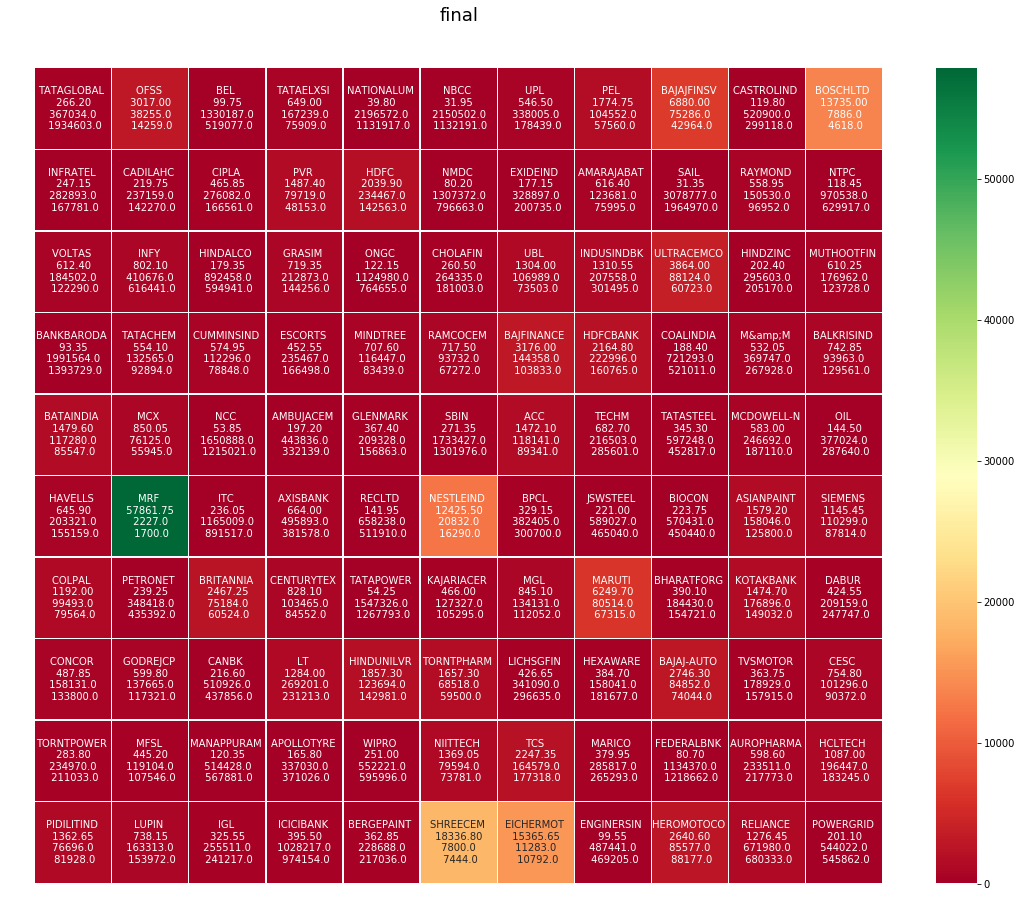

In [32]:
fig,ax=plt.subplots(figsize=(19,15))

#Set the font size and the distance of the title from the plot
plt.title('final',fontsize=18)
ttl=ax.title
ttl.set_position([0.5,1.05])

#ide ticks for the x & y axis
ax.set_xticks([])
ax.set_yticks([])

#remove the axis
ax.axis('off')
#Use the heatmap function from the seaborn package
sn.heatmap(result,annot=labels,fmt="",cmap="RdYlGn",linewidth=0.30,ax=ax)
#sn.heatmap(result,annot=labels,fmt="",cmap="RdYlGn",linewidth=0.30,ax=ax)

#display fifty 50
plt.show()